In [124]:
import pandas as pd
import seaborn as sns
import datetime 

Matplotlib is building the font cache; this may take a moment.


In [82]:
df = pd.read_csv("rencent_tracks.csv")
df.head()

,name,artist,album,duration_ms,popularity,played_at
0,When You Were Young,The Killers,Sam's Town,220426,74,2023-01-31 21:35:34
1,No You Girls,Franz Ferdinand,Tonight,223786,59,2023-01-31 20:41:55
2,Breezeblocks,alt-J,An Awesome Wave,227080,70,2023-01-31 20:38:11
3,Just A Dream,Nelly,5.0,237800,72,2023-01-31 20:34:23
4,Cold Cold Cold,Cage The Elephant,Tell Me I'm Pretty,214386,66,2023-01-31 20:30:25


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         61 non-null     object        
 1   artist       61 non-null     object        
 2   album        61 non-null     object        
 3   duration_ms  61 non-null     int64         
 4   popularity   61 non-null     int64         
 5   played_at    61 non-null     datetime64[ns]
 6   time         61 non-null     object        
 7   section_day  61 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 3.9+ KB


# Most listened artists

,artist,num_list
0,Imagine Dragons,5
1,The Killers,3
2,R. City,3
3,Black Eyed Peas,2
4,Twenty One Pilots,2


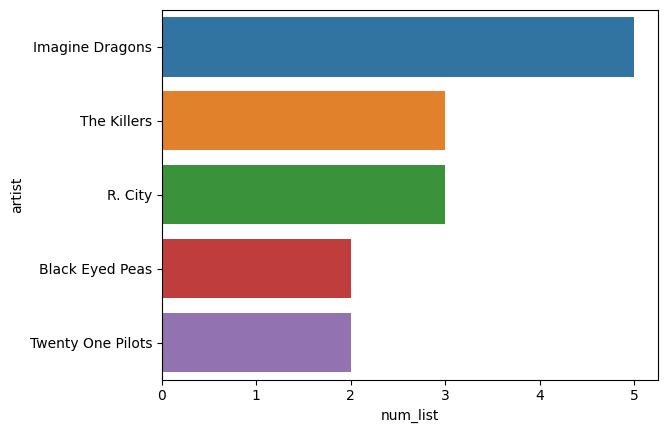

In [141]:
artist_most_played = df["artist"].value_counts()

artist_most_played = pd.DataFrame(df["artist"].value_counts().reset_index().values, columns=["artist", "num_list"])[0:5]
sns.barplot(data=artist_most_played, y="artist", x="num_list")
artist_most_played.head()

# Most listened tracks

,Track,repetitions
0,Locked Away (feat. Adam Levine),3
1,When You Were Young,2
2,Ride,1
3,Arre,1
4,Close Eyes,1


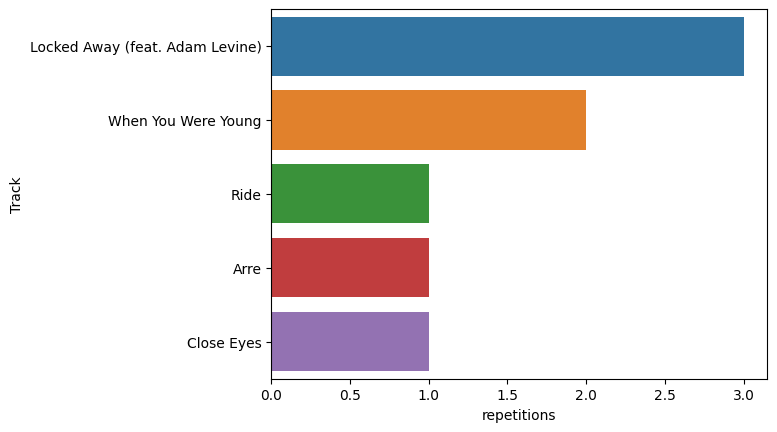

In [140]:
tracks_most_played = pd.DataFrame(df["name"].value_counts().reset_index().values, columns=["Track","repetitions"])[0:5]
sns.barplot(data=tracks_most_played, x="repetitions", y="Track")
tracks_most_played.head()

# average song length

In [159]:
track_mean_duration = pd.to_timedelta(df["duration_ms"], unit='ms').mean()
track_mean_duration

Timedelta('0 days 00:03:32.174622950')

In [87]:
df["played_at"] = pd.to_datetime(df["played_at"])
df["played_at"].head()

0   2023-01-31 21:35:34
1   2023-01-31 20:41:55
2   2023-01-31 20:38:11
3   2023-01-31 20:34:23
4   2023-01-31 20:30:25
Name: played_at, dtype: datetime64[ns]

### extract time of day

In [88]:
df["time"] = df["played_at"].dt.time
df["time"].head()

0    21:35:34
1    20:41:55
2    20:38:11
3    20:34:23
4    20:30:25
Name: time, dtype: object

### section into hours: early morning, morning, afternoon, night

In [89]:
hn1 = datetime.time(00,00,00)
morning = datetime.time(6,0,0)
afternoon = datetime.time(12,0,0)
night = datetime.time(18,0,0)
hn2 = datetime.time(23,59,59)


In [94]:
df["section_day"] = 1 # arly morning
df.loc[(df["time"]>= morning) & (df["time"]<afternoon), "section_day"] = 2 # morning
df.loc[(df["time"]>= afternoon) & (df["time"]<night), "section_day"] = 3 # afternoon
df.loc[(df["time"]>= night) & (df["time"]<hn2), "section_day"] = 4  # night
df

,name,artist,album,duration_ms,popularity,played_at,time,section_day
0,When You Were Young,The Killers,Sam's Town,220426,74,2023-01-31 21:35:34,21:35:34,4
1,No You Girls,Franz Ferdinand,Tonight,223786,59,2023-01-31 20:41:55,20:41:55,4
2,Breezeblocks,alt-J,An Awesome Wave,227080,70,2023-01-31 20:38:11,20:38:11,4
3,Just A Dream,Nelly,5.0,237800,72,2023-01-31 20:34:23,20:34:23,4
4,Cold Cold Cold,Cage The Elephant,Tell Me I'm Pretty,214386,66,2023-01-31 20:30:25,20:30:25,4
...,...,...,...,...,...,...,...,...
56,When You Were Young,The Killers,Sam's Town,220426,74,2023-02-01 03:03:41,03:03:41,1
57,Warriors,Imagine Dragons,Smoke + Mirrors (Deluxe),171040,71,2023-02-01 16:19:13,16:19:13,3
58,Radioactive,Imagine Dragons,Radioactive,276040,62,2023-02-01 16:16:22,16:16:22,3
59,For Reasons Unknown,The Killers,Sam's Town,212266,59,2023-02-01 16:11:45,16:11:45,3


# time heard in each part of the hourly day

<AxesSubplot: xlabel='time_min', ylabel='section_day'>

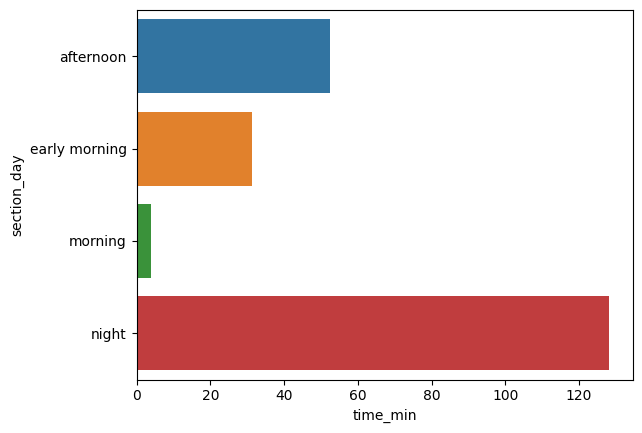

In [168]:
df_time_listened = df[["section_day","duration_ms"]]
df_time_listened = df_time_listened.replace([1,2,3,4],["early morning","morning","afternoon","night"])

time_listened = pd.DataFrame(df_time_listened.groupby("section_day").agg({"duration_ms":"sum"}).reset_index().values, columns=["section_day","time_ms"])
time_listened["time_min"] = (time_listened["time_ms"]/1000)/60
sns.barplot(data=time_listened,x="time_min", y="section_day")
# time_listened_time = pd.DataFrame(pd.to_timedelta(time_listened["duration_ms"], unit="ms").reset_index().values,columns=["section_day","time"])
# time_listened_time
